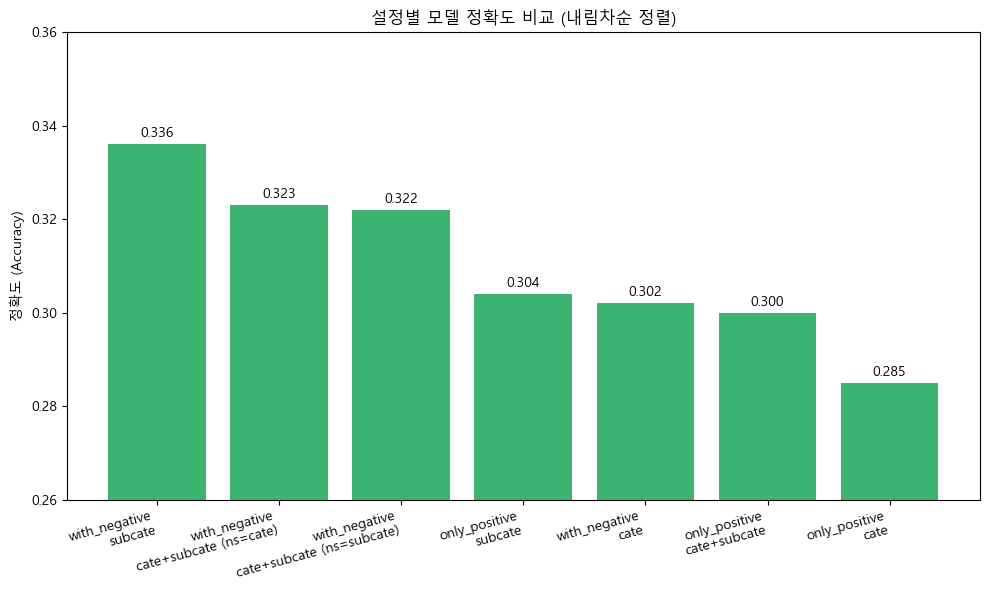

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 원본 데이터
labels = [
    'only_positive\nsubcate',
    'with_negative\nsubcate',
    'only_positive\ncate',
    'with_negative\ncate',
    'only_positive\ncate+subcate',
    'with_negative\ncate+subcate (ns=subcate)',
    'with_negative\ncate+subcate (ns=cate)'
]

model_acc = [0.304, 0.336, 0.285, 0.302, 0.300, 0.322, 0.323]

# 정렬 (내림차순)
sorted_data = sorted(zip(labels, model_acc), key=lambda x: x[1], reverse=True)
sorted_labels, sorted_acc = zip(*sorted_data)

x = np.arange(len(sorted_labels))

# 그래프
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(x, sorted_acc, color='mediumseagreen')

ax.set_ylabel('정확도 (Accuracy)')
ax.set_title('설정별 모델 정확도 비교 (내림차순 정렬)')
ax.set_xticks(x)
ax.set_xticklabels(sorted_labels, rotation=15, ha='right')
ax.set_ylim(0.26, 0.36)

# 값 표시
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


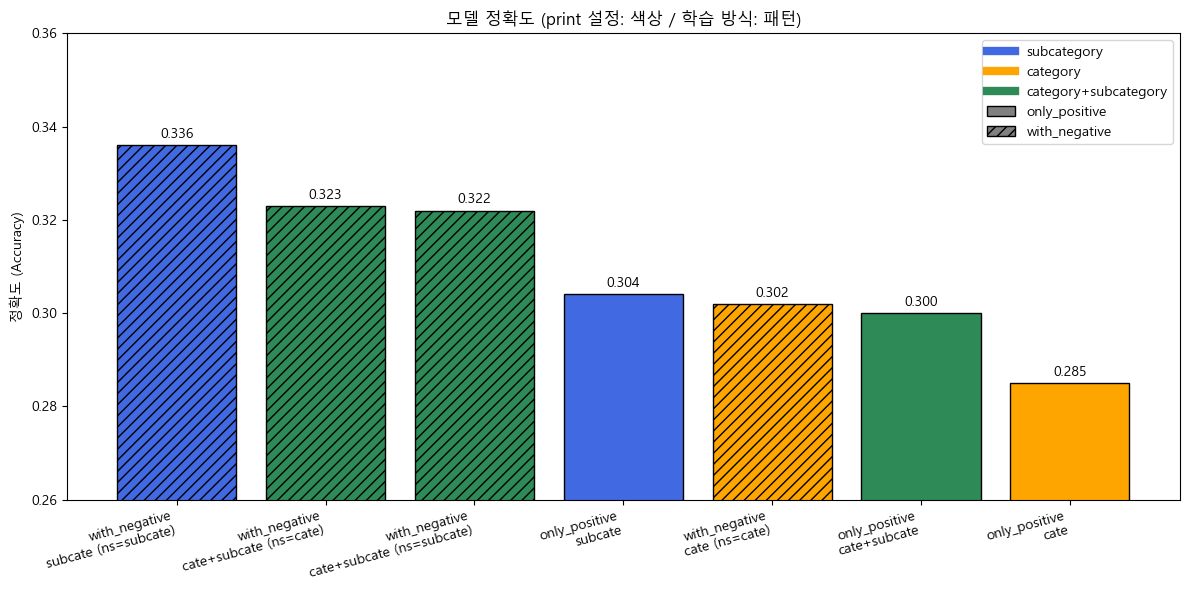

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 원본 데이터
labels = [
    'only_positive\nsubcate',
    'with_negative\nsubcate (ns=subcate)',
    'only_positive\ncate',
    'with_negative\ncate (ns=cate)',
    'only_positive\ncate+subcate',
    'with_negative\ncate+subcate (ns=subcate)',
    'with_negative\ncate+subcate (ns=cate)'
]

model_acc = [0.304, 0.336, 0.285, 0.302, 0.300, 0.322, 0.323]


# print 유형 분류
def classify_type(label):
    if 'cate+subcate' in label:
        return 'cate+subcate'
    elif 'subcate' in label:
        return 'subcate'
    else:
        return 'cate'

# only_positive / with_negative 분류
def classify_mode(label):
    return 'with_negative' if 'with_negative' in label else 'only_positive'

# 분류 정보 생성
types = [classify_type(label) for label in labels]
modes = [classify_mode(label) for label in labels]

# 정렬 (내림차순)
combined = sorted(zip(labels, model_acc, types, modes), key=lambda x: x[1], reverse=True)
sorted_labels, sorted_acc, sorted_types, sorted_modes = zip(*combined)

# 색상 매핑 (print 설정)
type_colors = {
    'subcate': 'royalblue',
    'cate': 'orange',
    'cate+subcate': 'seagreen'
}
colors = [type_colors[t] for t in sorted_types]

# 패턴 매핑 (mode 설정)
mode_hatches = {
    'only_positive': '',
    'with_negative': '///'
}
hatches = [mode_hatches[m] for m in sorted_modes]

x = np.arange(len(sorted_labels))

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 6))
bars = []
for i in range(len(x)):
    bar = ax.bar(x[i], sorted_acc[i], color=colors[i], hatch=hatches[i], edgecolor='black')
    bars.append(bar)

# 축 설정
ax.set_ylabel('정확도 (Accuracy)')
ax.set_title('모델 정확도 (print 설정: 색상 / 학습 방식: 패턴)')
ax.set_xticks(x)
ax.set_xticklabels(sorted_labels, rotation=15, ha='right')
ax.set_ylim(0.26, 0.36)

# 값 표시
for i, bar in enumerate(bars):
    height = sorted_acc[i]
    ax.annotate(f'{height:.3f}',
                xy=(x[i], height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# 범례
custom_legend = [
    plt.Line2D([0], [0], color='royalblue', lw=6, label='subcategory'),
    plt.Line2D([0], [0], color='orange', lw=6, label='category'),
    plt.Line2D([0], [0], color='seagreen', lw=6, label='category+subcategory'),
    plt.Rectangle((0, 0), 1, 1, facecolor='gray', hatch='', edgecolor='black', label='only_positive'),
    plt.Rectangle((0, 0), 1, 1, facecolor='gray', hatch='///', edgecolor='black', label='with_negative')
]
ax.legend(handles=custom_legend)

plt.tight_layout()
plt.show()